In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:
raw_train_features = pd.read_csv('/Users/pamelachavez/AllWomen/Module3/Project2/train_values.csv')
raw_train_labels = pd.read_csv('/Users/pamelachavez/AllWomen/Module3/Project2/train_labels.csv')
raw_test_features = pd.read_csv('/Users/pamelachavez/AllWomen/Module3/Project2/test_values.csv')

### Dealing with categorical variables

In [62]:
# One hot encoding of categorical variables

def hot_encode(df, lst):
    for i in lst:
        variable_df = pd.get_dummies(df[i], prefix = i)
        df = pd.concat([df, variable_df], axis=1)
        df = df.drop([i], axis=1)
    return df

categorical_features = ['foundation_type', 'land_surface_condition', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
extended_train_features = hot_encode(raw_train_features, categorical_features)

In [122]:
labels = raw_train_labels['damage_grade']
labels = np.array(labels)
labels  = labels[index]
unique_elements, counts_elements = np.unique(labels, return_counts=True)
np.asarray((unique_elements, counts_elements))


array([[  1,   2,   3],
       [119, 568, 313]])

In [121]:
features = raw_train_features[['geo_level_3_id','count_floors_pre_eq','age','area_percentage','height_percentage']]
features = np.array(features)
index = np.random.choice(len(raw_train_features), 1000, replace=False)
features = features[index]

In [ ]:
1 = 25124
2 = 148259
3 = 87218

In [7]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 5, shuffle=True)
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(700, 5)
(700,)
(300, 5)
(300,)


In [2]:
def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=data_cm.index, 
       xticklabels=data_cm.columns)

    sns.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

### SVM

In [8]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 5)
model.fit(train_features, train_labels)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=5, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
model_prediction = model.predict(test_features)

0.55


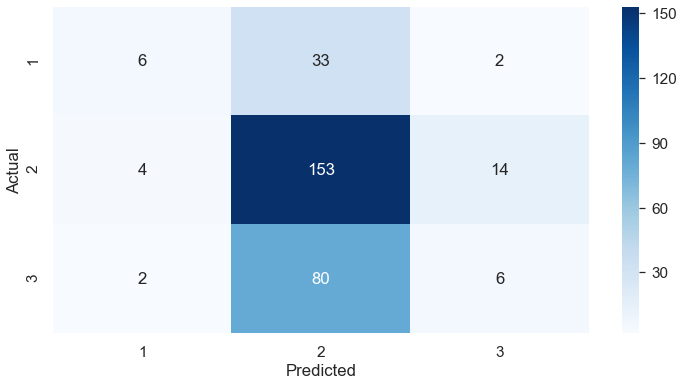

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusionMatrix(test_labels, model_prediction)
accuracy = accuracy_score(test_labels, model_prediction)
print(accuracy)

### Random Forest